<a href="https://colab.research.google.com/github/Edumate696/PI-Calculator/blob/main/PI_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PI Calculator

## Algo
1. Take n random pionts on a 2-D plane having both `x` and `y` in between 0 and 1, both included.
2. count the number of points wich lie on the `unit circle` drawn by using origin as center
3. The ratio of this count to the total number of points is appox. equal to $\pi$/4

## Define `Point` Class

In [1]:
class Point:
    def __init__(self, x : float, y : float):
        self.x = x
        self.y = y
    
    def isInsideUnitCircle(self) -> bool:
        return self.x**2 + self.y**2 <= 1
    
    def __str__(self) -> str:
        return f'Point: ({self.x : .2f}, {self.y : .2f})'

# Debug
point = Point(0., 0.)
print(point)

Point: ( 0.00,  0.00)


## Random Point batch generators

In [2]:
import random

def generate_random_point(seed=None):
    random.seed(seed)
    while True:
        yield Point(random.random(), random.random())

def generate_batch(batch_size=10, seed=None):
    batch = []
    for point in generate_random_point(seed=seed):
        batch.append(point)
        if len(batch) == batch_size: break
    return batch

# Debug
for p in generate_batch():
    print(p)

Point: ( 0.07,  0.87)
Point: ( 0.13,  0.68)
Point: ( 0.28,  0.96)
Point: ( 0.93,  0.41)
Point: ( 0.47,  0.34)
Point: ( 0.84,  0.15)
Point: ( 0.53,  0.83)
Point: ( 0.32,  0.83)
Point: ( 0.56,  0.05)
Point: ( 0.72,  0.06)


### Visualise

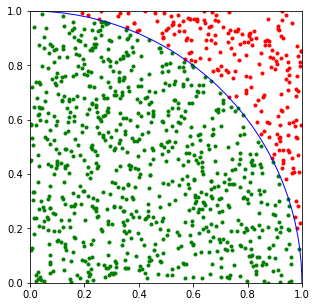

In [3]:
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
from typing import List

%matplotlib inline

def display_result(value: float, iter_id = None):
    clear_output()
    if iter_id: display(HTML(f'Iteration {iter_id}:'))
    display(HTML(f'<h1>Value of PI : {value}</h1>'))

def display_points(points: List[Point] = []):
    figure, axes = plt.subplots(1, figsize=(5, 5))
    axes.set_aspect(1)
    axes.add_artist(plt.Circle((0, 0), 1, fill = False, color='blue'))
    for point in points:
        plt.scatter(point.x, point.y, marker='.', c='green' if point.isInsideUnitCircle() else 'red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()

display_result(3.14) # For Debug only
display_points(generate_batch(1000))

### Calculate PI

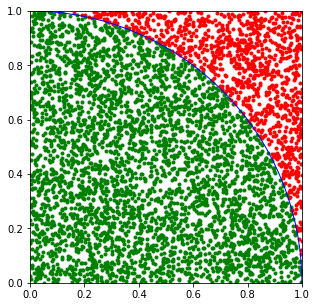

In [4]:
def calculate_pi(num_iter = 50, batch_size = 100, seed = None):
    total = 0
    count = 0
    points_list = []
    for t in range(num_iter):
        batch = generate_batch(batch_size=batch_size, seed=seed)
        points_list.extend(batch)
        total += len(batch)
        count += sum([1 for point in batch if point.isInsideUnitCircle()])
        pi = count/total * 4
        display_result(value=pi, iter_id=t+1)
    display_points(points=points_list)


calculate_pi()